"""
This worksheet shows how to estimate and visualise the heat pump Coefficient of Performance
across the course of a year

"""

In [2]:
# import the necessary modules, there are many more than in the previous example, 
# but the principle is the same

import numpy
import datetime
import pickle
import numpy
from numpy import genfromtxt
from datetime import *
import glob
import collections
from collections import OrderedDict
import pickle
import time
import smtplib
import calendar
import datetime
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})  
from numpy import genfromtxt
from datetime import datetime
plt.rc('font', **{'size':'8'})
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [8]:
# import the heat pump coefficeint data, this shows the relationship between temperature and COP
HP = numpy.genfromtxt('C:\\Users\\Ed Sharp\\Dropbox\\Linux_in_model\\other_arrays\\BSO_data_raw\\hp_cop_field_trial_data.csv', delimiter=',')

# translate to a dictionary, in this case by zipping together the two columns of values
cop_dict=dict(zip(HP[:,0], HP[:,1]))
    

In [5]:
HP[:,0]

array([ 200.,  201.,  202.,  203.,  204.,  205.,  206.,  207.,  208.,
        209.,  210.,  211.,  212.,  213.,  214.,  215.,  216.,  217.,
        218.,  219.,  220.,  221.,  222.,  223.,  224.,  225.,  226.,
        227.,  228.,  229.,  230.,  231.,  232.,  233.,  234.,  235.,
        236.,  237.,  238.,  239.,  240.,  241.,  242.,  243.,  244.,
        245.,  246.,  247.,  248.,  249.,  250.,  251.,  252.,  253.,
        254.,  255.,  256.,  257.,  258.,  259.,  260.,  261.,  262.,
        263.,  264.,  265.,  266.,  267.,  268.,  269.,  270.,  271.,
        272.,  273.,  274.,  275.,  276.,  277.,  278.,  279.,  280.,
        281.,  282.,  283.,  284.,  285.,  286.,  287.,  288.,  289.,
        290.,  291.,  292.,  293.,  294.,  295.,  296.,  297.,  298.,
        299.,  300.,  301.,  302.,  303.,  304.,  305.,  306.,  307.,
        308.,  309.,  310.,  311.,  312.,  313.,  314.,  315.,  316.,
        317.,  318.,  319.,  320.,  321.,  322.,  323.,  324.,  325.,
        326.,  327.,

In [9]:
cop_dict

{200.0: 1.0,
 201.0: 1.0,
 202.0: 1.0,
 203.0: 1.0,
 204.0: 1.0,
 205.0: 1.0,
 206.0: 1.0,
 207.0: 1.0,
 208.0: 1.0,
 209.0: 1.0,
 210.0: 1.0,
 211.0: 1.0,
 212.0: 1.0,
 213.0: 1.0,
 214.0: 1.0,
 215.0: 1.0,
 216.0: 1.0,
 217.0: 2.0,
 218.0: 2.0,
 219.0: 2.0,
 220.0: 2.0,
 221.0: 2.0,
 222.0: 2.0,
 223.0: 2.0,
 224.0: 2.0,
 225.0: 2.0,
 226.0: 2.0,
 227.0: 2.0,
 228.0: 2.0,
 229.0: 2.0,
 230.0: 2.0,
 231.0: 2.0,
 232.0: 2.0,
 233.0: 2.0,
 234.0: 2.0,
 235.0: 2.0,
 236.0: 2.0,
 237.0: 2.0,
 238.0: 2.0,
 239.0: 2.0,
 240.0: 2.0,
 241.0: 2.0,
 242.0: 2.0,
 243.0: 2.0,
 244.0: 2.0,
 245.0: 2.0,
 246.0: 2.0,
 247.0: 2.0,
 248.0: 2.0,
 249.0: 2.0,
 250.0: 2.0,
 251.0: 2.0,
 252.0: 2.0,
 253.0: 2.0,
 254.0: 2.0,
 255.0: 2.0,
 256.0: 2.0,
 257.0: 2.0,
 258.0: 2.0,
 259.0: 2.0,
 260.0: 2.0,
 261.0: 2.0,
 262.0: 2.0,
 263.0: 2.0,
 264.0: 2.1000000000000001,
 265.0: 2.2000000000000002,
 266.0: 2.2999999999999998,
 267.0: 2.3999999999999999,
 268.0: 2.5,
 269.0: 2.6000000000000001,
 270.0: 2.70000

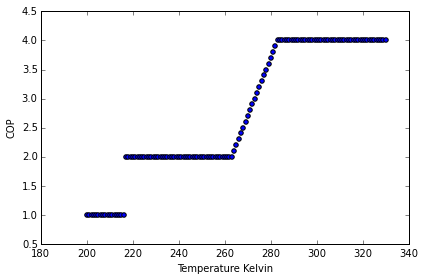

In [13]:
%matplotlib inline
plt.scatter(cop_dict.keys(),cop_dict.values())
plt.xlabel('Temperature Kelvin')
plt.ylabel('COP')
plt.savefig('dir..')

In [14]:
# The model is going to work on a grid covering GB, which eaxh grid square being a 0.5 degree square
# this line imports an array of values which show which of the grid sqaures contains land
land = numpy.load('C:\\Users\\Ed Sharp\\Dropbox\\Linux_in_model\\other_arrays\\land.npy') 

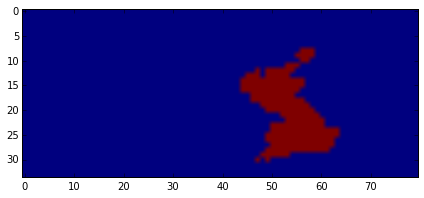

In [15]:
plt.imshow(land)

In [22]:
# to show the form of the land and demontstrate inline plotting

hp_results = {}
for year in range(2010, 2011):
    for month in range(1,13):
        print month
        for day in range(1,calendar.monthrange(year, month)[1]+1):
            for hour in range(0,24):
                
                temp_fname='C:\\Users\\Ed Sharp\\Dropbox\\Linux_in_model\\temp\\tmp2m_'+str(year)+'_'+str.zfill(str(month),2)+'_'+str.zfill(str(day),2)+'_'+str.zfill(str(hour),2)+'.csv.npy'
                ex_t = numpy.load(temp_fname)
                ex_t_1 = ex_t.reshape(2720,)
                
                hp_cop = []
                for ex in ex_t_1:
                    if numpy.around(ex) in cop_dict.keys():
                        hp_cop.append(cop_dict[numpy.around(ex)])
                    else:
                        print 'Warning: temperature not in range'
                
                hp_cop_final = numpy.asarray(hp_cop).reshape(34,80) *land 
                hp_results[str(year)+'_'+str.zfill(str(month),2)+'_'+str.zfill(str(day),2)+'_'+str.zfill(str(hour),2)] = hp_cop_final

1
2
3
4
5
6
7
8
9
10
11
12


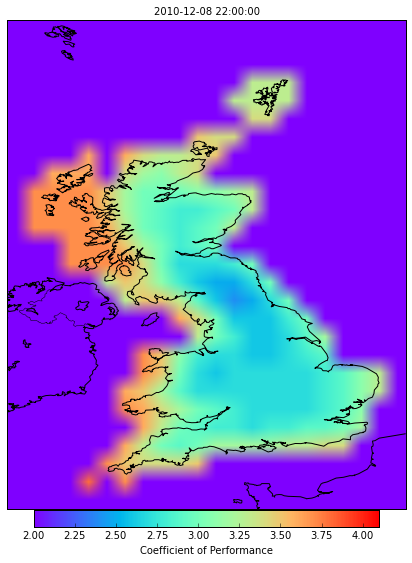

In [25]:
# create spatiotemporal dataset    
fig = plt.figure(figsize = (12,10))
ax = fig.add_axes([0.1,0.1,0.8,0.8])    
m = Basemap(llcrnrlon=-8.5,llcrnrlat=49,urcrnrlon=2.5,urcrnrlat=62.5,resolution='i',projection='cyl',ax=ax)
im =m.imshow(numpy.flipud(hp_results['2010_12_08_22'][5:32,43:65]),cmap=plt.cm.rainbow, clim=(2.0, 4.1))# m.imshow(topodat,cm.GMT_drywet_r, vmin=-5000, vmax=-0.1)
# draw coastlines and political boundaries.
m.drawcoastlines()
m.drawcountries()
ax.set_title(datetime.strptime(('2010_12_08_22'),'%Y_%m_%d_%H'), fontsize=10 )
cbar = fig.colorbar(im, shrink=0.5, orientation='horizontal', pad=0.001)
cbar.set_label('Coefficient of Performance')

In [ ]:
for key in hp_results.keys():
    fig = plt.figure(1)             
    m = Basemap(llcrnrlon=-8.5,llcrnrlat=49,urcrnrlon=2.5,urcrnrlat=62.5,resolution='i',projection='cyl')
    im =m.imshow(numpy.flipud(hp_results[key][5:32,43:65]),cmap=plt.cm.rainbow, clim=(2.0, 4.1))# m.imshow(topodat,cm.GMT_drywet_r, vmin=-5000, vmax=-0.1)

    m.drawcoastlines()
    m.drawcountries()
    title(datetime.strptime((key),'%Y_%m_%d_%H'), fontsize=10 )
    cbar = fig.colorbar(im)
    cbar.set_label('Coefficient of Performance')
    plt.savefig('C:\\Users\\Ed Sharp\\Dropbox\\Linux_in_model\\out_model\\animated\\hp_blog\\hpcop'+ key)
    clf()

In [ ]:
# save them all
